In [59]:
import sys
import numpy as np
import cv2
from time import sleep
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, read_excel, DataFrame
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)
p1 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCal')
p2 = os.path.join('../../','work','CookIRCamET','Working')
p3 = os.path.join('../../','raw','CookIRCamET','Images','CprlIRCal')
p4 = os.path.join('../../','work','CookIRCamET','Working')
p5 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlir2')
p6 = os.path.join('../../','work','CookIRCamET','Working')
p7 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlir3')
p8 = os.path.join('../../','work','CookIRCamET','Working')

In [60]:
bgr_5_9 = cv2.imread(os.path.join(p1,'cal_5_9_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_5_9 = cv2.imread(os.path.join(p1,'cal_5_9_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_7_0 = cv2.imread(os.path.join(p1,'cal_7_0_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_7_0 = cv2.imread(os.path.join(p1,'cal_7_0_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_7_2 = cv2.imread(os.path.join(p1,'cal_7_2_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_7_2 = cv2.imread(os.path.join(p1,'cal_7_2_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_7_5 = cv2.imread(os.path.join(p1,'cal_7_5_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_7_5 = cv2.imread(os.path.join(p1,'cal_7_5_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_35_4 = cv2.imread(os.path.join(p1,'cal_35_4_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_35_4 = cv2.imread(os.path.join(p1,'cal_35_4_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_36_2 = cv2.imread(os.path.join(p1,'cal_36_2_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_36_2 = cv2.imread(os.path.join(p1,'cal_36_2_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_37_1 = cv2.imread(os.path.join(p1,'cal_37_1_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_37_1 = cv2.imread(os.path.join(p1,'cal_37_1_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_38_0 = cv2.imread(os.path.join(p1,'cal_38_0_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_38_0 = cv2.imread(os.path.join(p1,'cal_38_0_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_39_4 = cv2.imread(os.path.join(p1,'cal_39_4_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_39_4 = cv2.imread(os.path.join(p1,'cal_39_4_ir.png'),cv2.IMREAD_UNCHANGED)


In [61]:
bgr_20_0 = cv2.imread(os.path.join(p3,'20220430170628_nofix_20C_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_20_0 = cv2.imread(os.path.join(p3,'20220430170628_nofix_20C_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_25_0 = cv2.imread(os.path.join(p3,'20220430170937_nofix_25C_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_25_0 = cv2.imread(os.path.join(p3,'20220430170937_nofix_25C_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_30_0 = cv2.imread(os.path.join(p3,'20220430171240_nofix_30C_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_30_0 = cv2.imread(os.path.join(p3,'20220430171240_nofix_30C_ir.png'),cv2.IMREAD_UNCHANGED)
bgr_35_0 = cv2.imread(os.path.join(p3,'20220430171612_nofix_35C_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_35_0 = cv2.imread(os.path.join(p3,'20220430171612_nofix_35C_ir.png'),cv2.IMREAD_UNCHANGED)


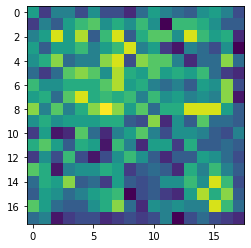

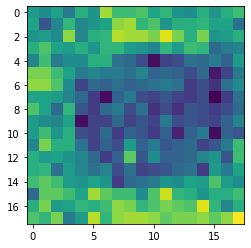

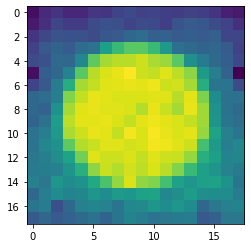

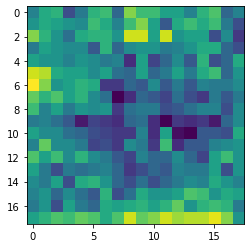

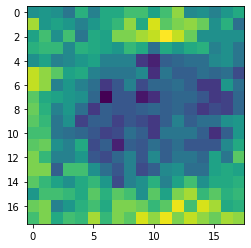

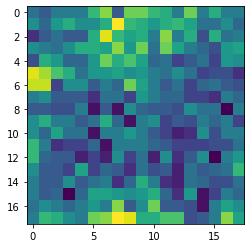

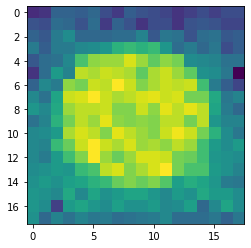

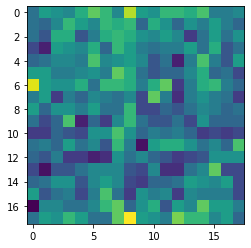

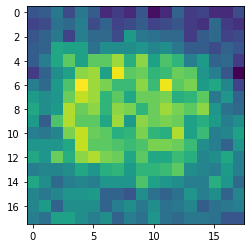

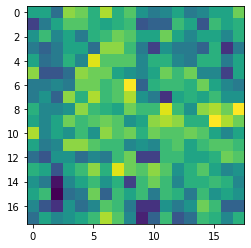

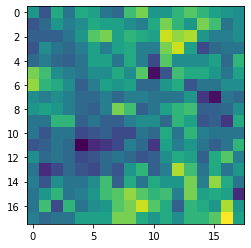

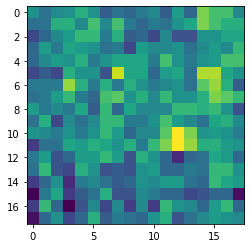

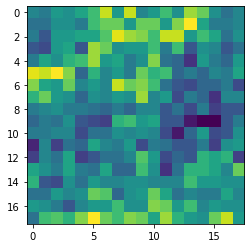

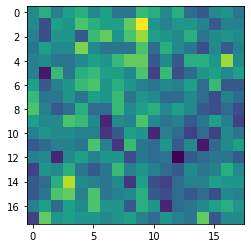

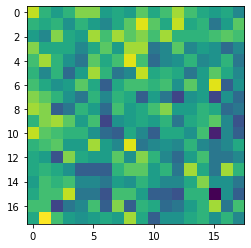

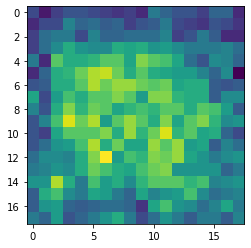

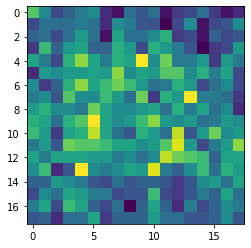

In [86]:
bgr_38_8 = cv2.imread(os.path.join(p5,'20220705200229_38_8_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_38_8 = cv2.imread(os.path.join(p5,'20220705200229_38_8_ir.png'),cv2.IMREAD_UNCHANGED)
flir_max = np.max(np.max(ir_38_8))
i,j=np.where(ir_38_8==flir_max)
j=j+1
i=i+4
t_ir_flir=[]
t_meas_flir=[]
for f in os.listdir(p5):
    if '_ir' in f:
        ir = cv2.imread(os.path.join(p5,f),cv2.IMREAD_UNCHANGED)
        t_ir_flir.append(np.mean(ir[int(i)-3:int(i)+3,int(j)-3:int(j)+3]))
        t_meas_flir.append(int(f.split('_')[1])+int(f.split('_')[2])/10) 
        plt.imshow(ir[int(i)-9:int(i)+9,int(j)-9:int(j)+9])
        plt.show()

In [87]:
t_meas_flir=np.array(t_meas_flir).reshape(-1,1)+273.15
t_ir_flir=np.array(t_ir_flir).reshape(-1,1)

In [64]:
vmax,vmin = np.max(np.max(ir_39_4)),np.min(np.min(ir_5_9))

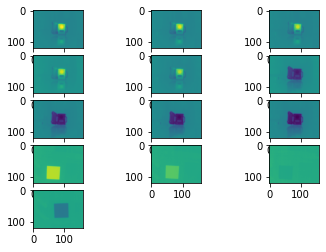

In [65]:
plt.subplot(5,3,1)
plt.imshow(ir_39_4, vmin=vmin, vmax=vmax)
plt.subplot(5,3,2)
plt.imshow(ir_38_0, vmin=vmin, vmax=vmax)
plt.subplot(5,3,3)
plt.imshow(ir_37_1, vmin=vmin, vmax=vmax)
plt.subplot(5,3,4)
plt.imshow(ir_36_2, vmin=vmin, vmax=vmax)
plt.subplot(5,3,5)
plt.imshow(ir_35_4, vmin=vmin, vmax=vmax)
plt.subplot(5,3,6)
plt.imshow(ir_7_5, vmin=vmin, vmax=vmax)
plt.subplot(5,3,7)
plt.imshow(ir_7_2, vmin=vmin, vmax=vmax)
plt.subplot(5,3,8)
plt.imshow(ir_7_0, vmin=vmin, vmax=vmax)
plt.subplot(5,3,9)
plt.imshow(ir_5_9, vmin=vmin, vmax=vmax)
plt.subplot(5,3,10)
plt.imshow(ir_35_0, vmin=vmin, vmax=vmax)
plt.subplot(5,3,11)
plt.imshow(ir_30_0, vmin=vmin, vmax=vmax)
plt.subplot(5,3,12)
plt.imshow(ir_25_0, vmin=vmin, vmax=vmax)
plt.subplot(5,3,13)
plt.imshow(ir_20_0, vmin=vmin, vmax=vmax)

In [66]:
i,j=np.where(ir_5_9==np.min(np.min(ir_5_9)))
t_5_9=np.mean(ir_5_9[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

i,j=np.where(ir_7_0==np.min(np.min(ir_7_0)))
t_7_0=np.mean(ir_7_0[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

i,j=np.where(ir_7_2==np.min(np.min(ir_7_2)))
t_7_2=np.mean(ir_7_2[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

i,j=np.where(ir_7_5==np.min(np.min(ir_7_5)))
t_7_5=np.mean(ir_7_5[int(i)-5:int(i)+5,int(j)-5:int(j)+5])


In [67]:
i,j=np.where(ir_39_4==np.max(np.max(ir_39_4)))
t_39_4=np.mean(ir_39_4[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

i,j=np.where(ir_38_0==np.max(np.max(ir_38_0)))
t_38_0=np.mean(ir_38_0[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

i,j=np.where(ir_37_1==np.max(np.max(ir_37_1)))
t_37_1=np.mean(ir_37_1[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

i,j=np.where(ir_36_2==np.max(np.max(ir_36_2)))
t_36_2=np.mean(ir_36_2[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

i,j=np.where(ir_35_4==np.max(np.max(ir_35_4)))
t_35_4=np.mean(ir_35_4[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

In [82]:
i,j=np.where(ir_35_0==np.max(np.max(ir_35_0)))
t_35_0=np.mean(ir_35_0[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

In [84]:
t_30_0=np.mean(ir_30_0[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

In [85]:
#i,j=np.where(ir_25_0==np.max(np.max(ir_25_0)))
t_25_0=np.mean(ir_25_0[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

In [71]:
i,j=np.where(ir_20_0==np.min(np.min(ir_20_0)))
i = int(np.mean(i))
j = int(np.mean(j))
t_20_0=np.mean(ir_20_0[int(i)-5:int(i)+5,int(j)-5:int(j)+5])

In [72]:
bgr_01_7 = cv2.imread(os.path.join(p7,'20221122181944_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_01_7 = cv2.imread(os.path.join(p7,'20221122181939_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_9_0 = cv2.imread(os.path.join(p7,'20221122183450_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_9_0 = cv2.imread(os.path.join(p7,'20221122183440_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_13_8 = cv2.imread(os.path.join(p7,'20221122184955_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_13_8 = cv2.imread(os.path.join(p7,'20221122184940_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_16_6 = cv2.imread(os.path.join(p7,'20221122190501_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_16_6 = cv2.imread(os.path.join(p7,'20221122190441_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_18_2 = cv2.imread(os.path.join(p7,'20221122192006_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_18_2 = cv2.imread(os.path.join(p7,'20221122191941_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_19_0 = cv2.imread(os.path.join(p7,'20221122193512_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_19_0 = cv2.imread(os.path.join(p7,'20221122193442_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_35_0 = cv2.imread(os.path.join(p7,'20221122195338_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_35_0 = cv2.imread(os.path.join(p7,'20221122195333_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_30_2 = cv2.imread(os.path.join(p7,'20221122195804_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_30_2 = cv2.imread(os.path.join(p7,'20221122195759_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_24_1 = cv2.imread(os.path.join(p7,'20221122201310_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_24_1 = cv2.imread(os.path.join(p7,'20221122201300_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_22_3 = cv2.imread(os.path.join(p7,'20221122202815_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_22_3 = cv2.imread(os.path.join(p7,'20221122202800_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_21_5 = cv2.imread(os.path.join(p7,'20221122204320_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_21_5 = cv2.imread(os.path.join(p7,'20221122204301_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_21_1 = cv2.imread(os.path.join(p7,'20221122205826_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_21_1 = cv2.imread(os.path.join(p7,'20221122205801_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

bgr_21_0 = cv2.imread(os.path.join(p7,'20221122211236_nofix_bgr.png'),cv2.IMREAD_UNCHANGED)
ir_21_0 = cv2.imread(os.path.join(p7,'20221122211231_nofix_ir.png'),cv2.IMREAD_UNCHANGED)

ir_list = [ir_01_7,ir_9_0,ir_13_8,ir_16_6,ir_18_2,ir_19_0,ir_35_0,ir_30_2,ir_24_1,ir_22_3,ir_21_5,ir_21_1,ir_21_0]
t_meas_1122 = [1.7,9.0,13.8,16.6,18.2,19,35,30.2,24.1,22.3,21.5,21.1,21.0]

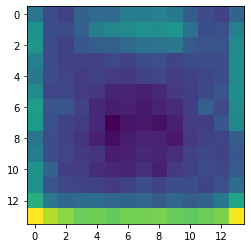

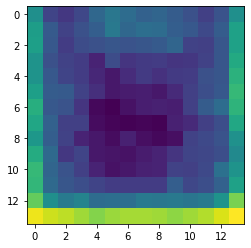

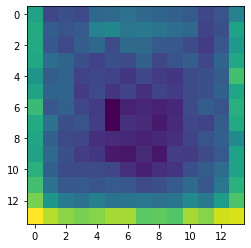

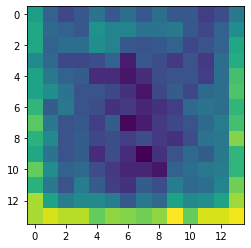

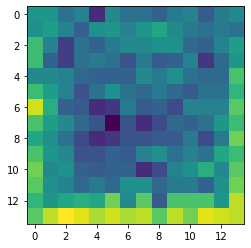

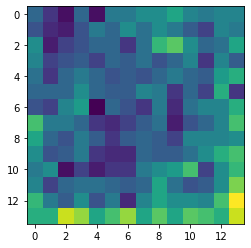

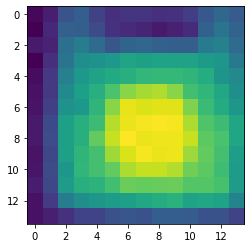

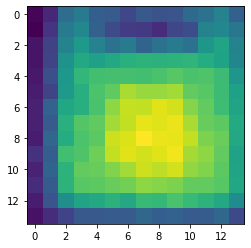

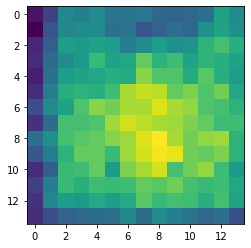

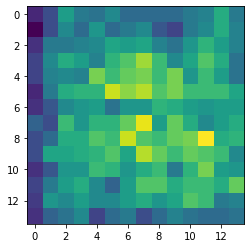

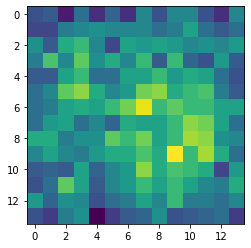

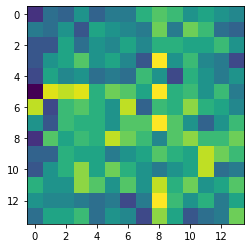

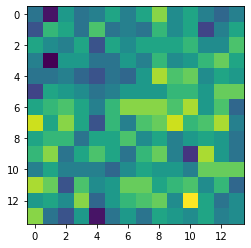

In [73]:
flir_max = np.max(np.max(ir_35_0))
i,j=np.where(ir_35_0==flir_max)
flir_min = np.min(np.min(ir_01_7))
k,l=np.where(ir_01_7==flir_min)
j=(l+j)/2+2
i=(k+i)/2
t_ir_flir_1122=[]

for ir in ir_list:
    t_ir_flir_1122.append(np.mean(ir[int(i)-3:int(i)+3,int(j)-3:int(j)+3]))
    plt.imshow(ir[int(i)-7:int(i)+7,int(j)-7:int(j)+7])
    plt.show()

In [74]:
T_nsar = np.array([5.9,7.0,7.2,7.5,35.4,36.2,37.1,38.0,39.4])+273.15
IR_nsar = np.array([t_5_9,t_7_0,t_7_2,t_7_5,t_35_4,t_36_2,t_37_1,t_38_0,t_39_4])

In [75]:
t_meas_1122=np.array(t_meas_1122)+273.15
t_ir_flir_1122=np.array(t_ir_flir_1122)

In [76]:
T_cprl = np.array([20,25,30,35])+273.15
IR_cprl = np.array([t_20_0,t_25_0,t_30_0,t_35_0])

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(IR_nsar.reshape(-1,1),T_nsar.reshape(-1,1))
T_pred_nsar = model.intercept_+model.coef_*IR_nsar

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(IR_cprl.reshape(-1,1),T_cprl.reshape(-1,1))
T_pred_cprl = model.intercept_+model.coef_*IR_cprl

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(t_ir_flir,t_meas_flir)
T_pred_flir = model.intercept_+model.coef_*t_ir_flir
filename = 'calibration.pk.sav'
import pickle
pickle.dump(model, open(filename, 'wb'))

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(t_ir_flir_1122.reshape(-1,1),t_meas_1122.reshape(-1,1))
T_pred_flir = model.intercept_+model.coef_*t_ir_flir_1122
filename = 'calibration2.pk.sav'
import pickle
pickle.dump(model, open(filename, 'wb'))

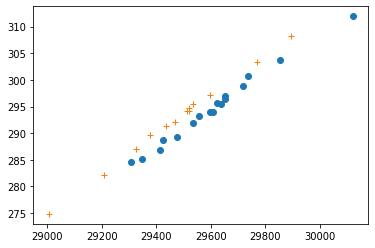

In [89]:
plt.plot(t_ir_flir,t_meas_flir,'o',t_ir_flir_1122,t_meas_1122,'+')

In [90]:
model.intercept_[0],model.coef_[0][0]

(-751.1862844485743, 0.03532537680056742)